In [1]:
import librosa
data, sample_rate = librosa.load('/workspace/train/data/노인남여_노인대화07_F_1520511716_63_수도권_실내_P00376.wav', sr = 16000)

### Waveform 시각화

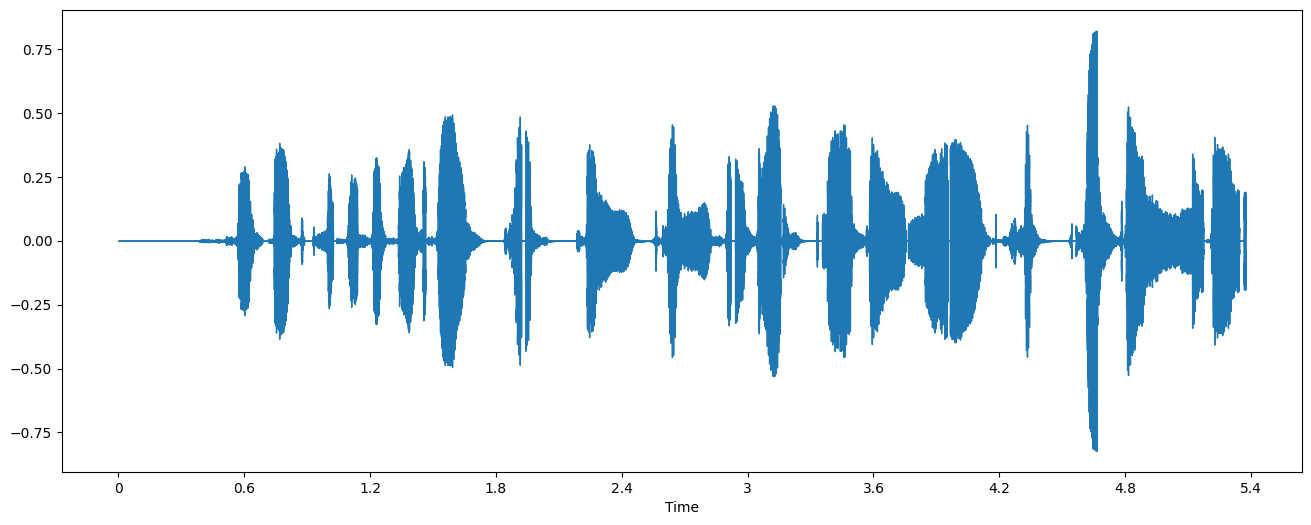

In [2]:
import matplotlib.pyplot as plt
import librosa.display
 
plt.figure(figsize =(16,6))
librosa.display.waveshow(y=data,sr=sample_rate)
plt.show()

Text(0.5, 1.0, 'Power spectrum')

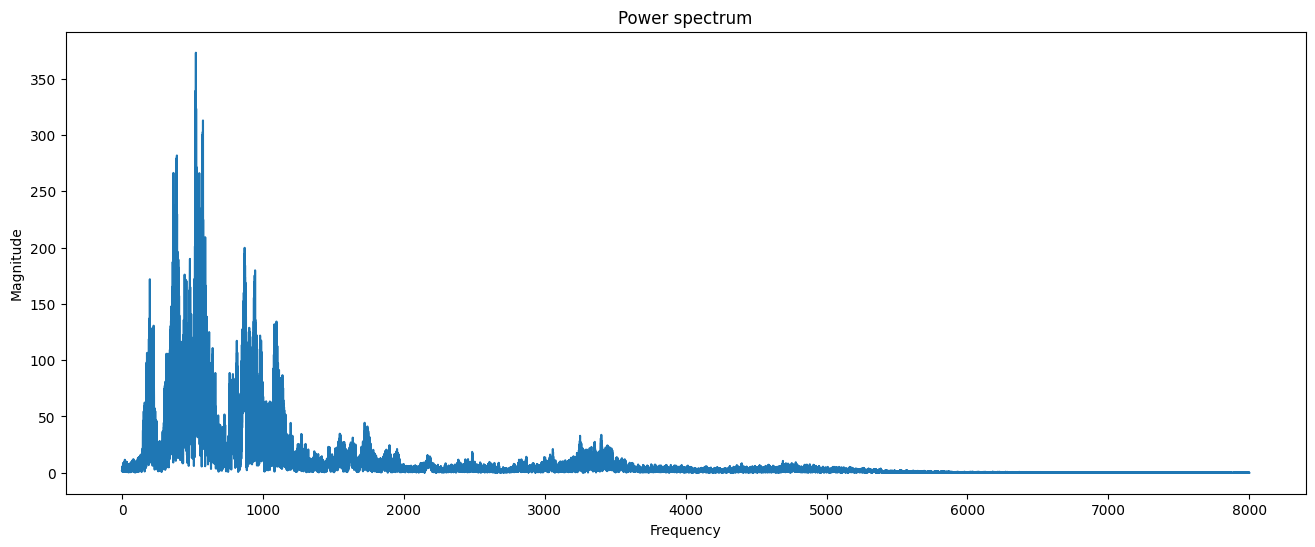

In [4]:
import numpy as np

fft = np.fft.fft(data)
 
# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft)
 
# Frequency 값 만들기
f = np.linspace(0,sample_rate,len(magnitude))
 
# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]
 
plt.figure(figsize=(16,6))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Spectrogram (dB)')

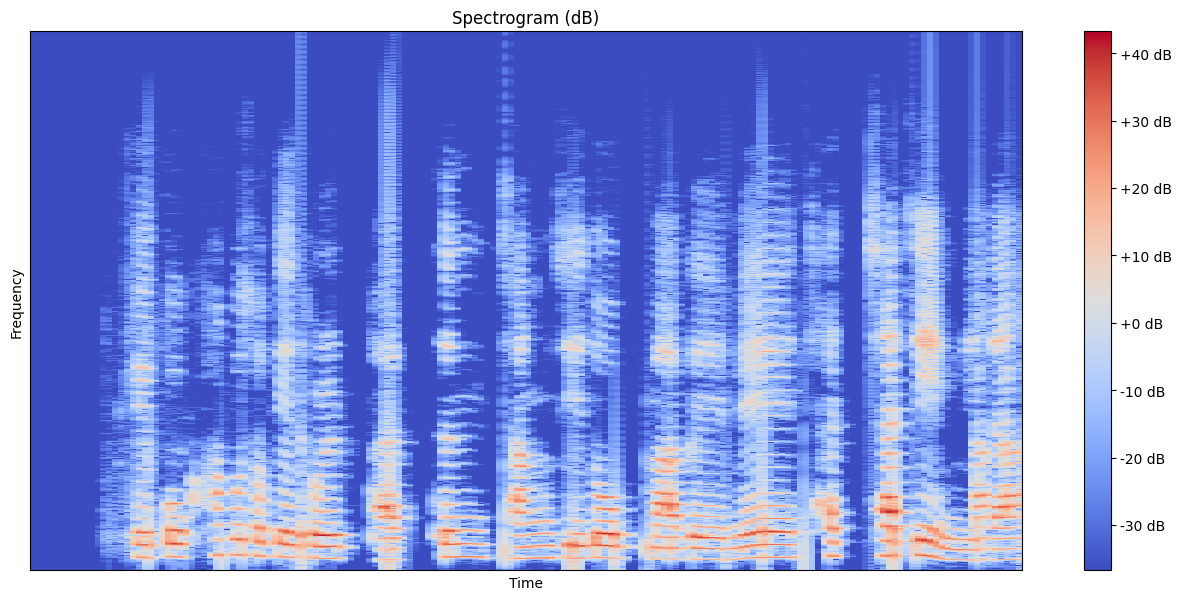

In [7]:
# STFT -> spectrogram
hop_length = 512
n_fft = 2048
 
# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate
 
# STFT
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)
 
# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)
 
# magnitude > Decibels
log_spectrogram = librosa.amplitude_to_db(magnitude)
 
# display spectrogram
plt.figure(figsize=(16,7))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")